In [1]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
%matplotlib inline  


In [2]:
run = json.load(open("/network/scratch/w/weissmar/tn/info-bazaar/runs/2023-08-12-13-34-26/bazaar_summary.json", "r"))

In [3]:
buyers = run['buyer_agents']
vendors = run['vendor_agents']

In [4]:
credits = [vendor.get('credit') for vendor in vendors if vendor.get('credit') != 0.0]

Text(0.5, 1.0, 'Vendor Wealth')

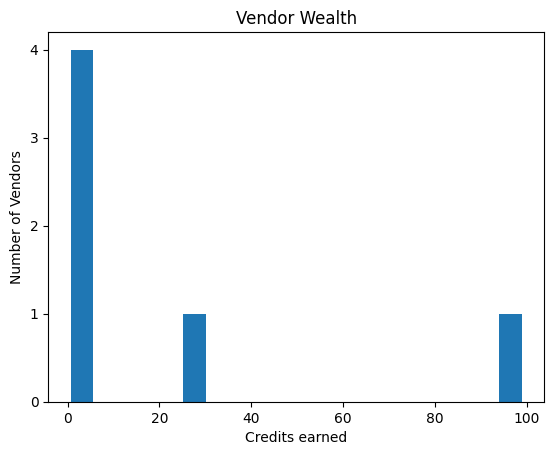

In [5]:
ax = plt.figure().gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.hist(credits, bins=20)
plt.xlabel("Credits earned")
plt.ylabel("Number of Vendors")
plt.title("Vendor Wealth")

In [6]:
type([buyer['principal']['answer']['success'] for buyer in buyers][0])

bool

In [7]:
all_relevance_scores_of_rejected_quotes = []
relevance_scores_of_rejected_quotes_for_successful_queries = []
relevance_scores_of_rejected_quotes_for_failed_queries = []
relevance_scores_of_accepted_quotes = []
rej_len = []
acp_len = []
for buyer in buyers:
    query_success = buyer['principal']['answer']['success']
    query = buyer['submitted_queries'][0]
    accepted_quotes = buyer['accepted_quotes']
    rejected_quotes = buyer['rejected_quotes']
    gold_block_id = query['gold_block_id']
    gold_block_in_rejected_quotes = False
    relevance_scores_of_rejected_quotes = []
    for q in rejected_quotes:
        for answer_block in q['answer_blocks']:
            if answer_block['block_id'] == gold_block_id:
                gold_block_in_rejected_quotes = True
            rej_len.append(len(answer_block['content']))
        relevance_scores_of_rejected_quotes.append(q['relevance_scores'][0])
        if query_success:
            relevance_scores_of_rejected_quotes_for_successful_queries.extend(relevance_scores_of_rejected_quotes)
        else:
            relevance_scores_of_rejected_quotes_for_failed_queries.extend(relevance_scores_of_rejected_quotes)
    for q in accepted_quotes:
        relevance_scores_of_accepted_quotes.append(q['relevance_scores'][0])
        for answer_block in q['answer_blocks']:
            acp_len.append(len(answer_block['content']))
    all_relevance_scores_of_rejected_quotes.append(relevance_scores_of_rejected_quotes)

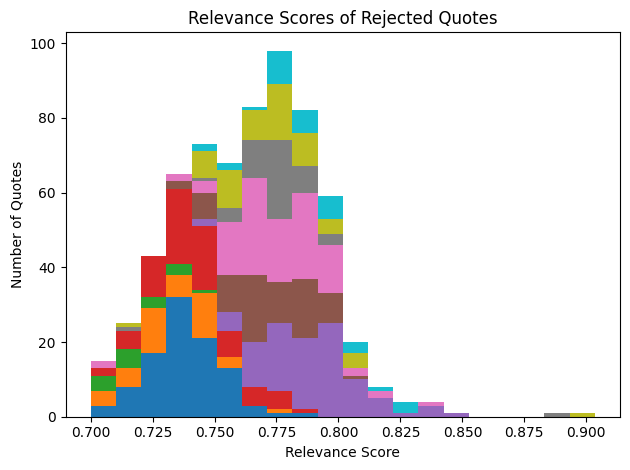

In [8]:
colors = plt.cm.tab10(np.linspace(0, 1, len(all_relevance_scores_of_rejected_quotes)))

plt.hist(all_relevance_scores_of_rejected_quotes, stacked=True, bins=20, color=colors)
plt.title("Relevance Scores of Rejected Quotes")
plt.xlabel("Relevance Score")
plt.ylabel("Number of Quotes")
# Adjust spacing and show plot
plt.tight_layout()
plt.show()


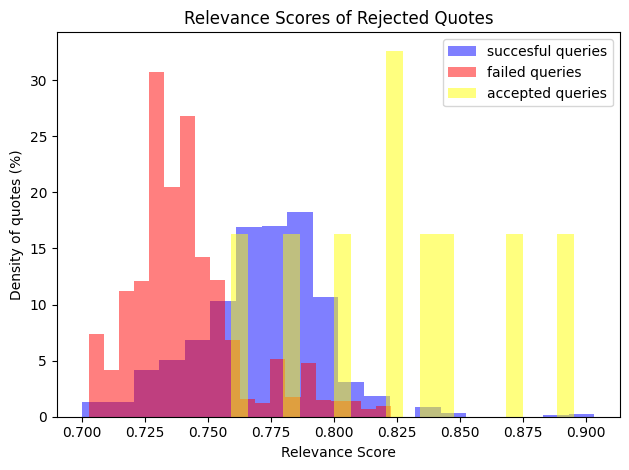

In [9]:
colors = plt.cm.tab10(np.linspace(0, 1, 2))

plt.hist(relevance_scores_of_rejected_quotes_for_successful_queries, stacked=False, bins=20, density=True, alpha=0.5, color="blue", label="succesful queries")
plt.hist(relevance_scores_of_rejected_quotes_for_failed_queries, stacked=False, bins=20,density=True, alpha=0.5, color="red", label="failed queries")
plt.hist(relevance_scores_of_accepted_quotes, stacked=False, bins=20, alpha=0.5, density=True, color="yellow", label="accepted queries")

plt.title("Relevance Scores of Rejected Quotes")
plt.xlabel("Relevance Score")
plt.ylabel("Density of quotes (%)")
plt.legend()
# Adjust spacing and show plot
plt.tight_layout()
plt.show()


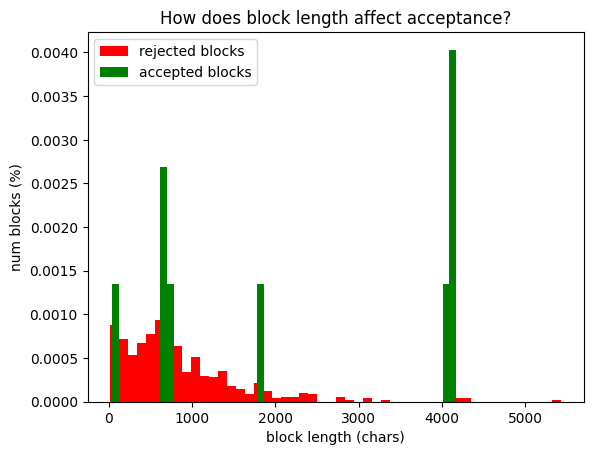

In [10]:
plt.hist(rej_len, bins=50, density=True, color="red", label="rejected blocks")
plt.hist(acp_len, bins=50, density=True, color="green", label="accepted blocks")
plt.title("How does block length affect acceptance?")
plt.xlabel("block length (chars)")
plt.ylabel("num blocks (%)")
plt.legend()

In [ ]:
# you could generate (say) 5 variations of the question (however u want). embed the questions, and the hyde answers, and then look at mean norm of the deviation of each of the 5 embeddings from the mean embedding vector over all 5 variations. do the same for raw questions and hyde answers. if the variation is smol for hyde, that’s good. then u can have a plot with mean variation of hyde (on x axis) vs mean variation of raw queries (on y axis) and look at the slope





In [1]:
from bazaar.lem_utils import generate_hyde_passage

In [4]:
generate_hyde_passage(question=)

<function bazaar.lem_utils.generate_hyde_passage(question: str, model: str = 'gpt-3.5-turbo') -> str>

In [ ]:
# There seems to be a bias towards longer blocks. Longer blocks are more likely to contain an answer, but could also be fooling the purchaser. We could investigate this by pretending that block is the gold block to generate an open book answer, and then evaluate it against the actual gold block open book answer.
